# House Price Prediction Model

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from tabulate import tabulate

# Settings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Task 1: 
Exploratory Data Analysis.


Step 1: Read and combine the train and test datasets. Proceed through the data you combined.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df = pd.concat([train, test], ignore_index=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


In [4]:
def check_df(dataframe, head=7, tail=7):
    '''
    Prints the general information about the given dataframe e.g. shape, head,
    tail, info, descriptive statistics, etc.

    Parameters
    ----------
    dataframe : DataFrame
        The dataframe that we want to have general information about.
    head: int
        Prints the first n rows of the dataframe.
    tail: int
        Prints the last n rows of the dataframe.
    '''
    print('####### Shape #######')
    print(dataframe.shape)
    print('####### Info #######')
    print(dataframe.info())
    print('####### Head #######')
    print(dataframe.head(head))
    print('####### Tail #######')
    print(dataframe.tail(tail))
    print('####### Descriptive Statistics #######')
    print(dataframe.describe([0.05, 0.25, 0.50, 0.75 ,0.95, 0.99]).T)
    print('####### NA #######')
    print(dataframe.isnull().sum())
    print('####### Number of Unique Values #######')
    print(dataframe.nunique())


check_df(df)

####### Shape #######
(2919, 81)
####### Info #######
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17

Step 2: Capture the numeric and categorical variables.

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    '''
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included.
    
    Parameters
    ----------
    dataframe : DataFrame
        The dataframe containing the data
    cat_th : int, optional
        Class threshold value for variables that appear numerical but are categorical
    car_th : int, optional
        Class threshold value for variables that appear categorical but are cardinal

    Returns
    -------
    cat_cols: list
        Categorical variable list
    num_cols: list
        Numerical variable list
    cat_but_car: list
        List of cardinal variables appearing categorical

    Notes
    -----
    Total number of variables: cat_cols + num_cols + cat_but_car
    num_but_cat inside cat_cols
    '''
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != 'O']
    
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == 'O']
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Report
    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 28
cat_but_car: 1
num_but_cat: 10


In [6]:
print('Categorical Variables:', cat_cols, 
      '\nNumerical Variables:', num_cols, 
      '\nCategorical but Cardinal Variables:', cat_but_car)

Categorical Variables: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'YrSold'] 
Numerical Variables: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'Gara

Step 3: Analyze the numerical and categorical variables.

In [7]:
# Numerical variables
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()
    print()


for col in num_cols:
    num_summary(df, col, plot=False)

count   2919.000
mean    1460.000
std      842.787
min        1.000
5%       146.900
10%      292.800
20%      584.600
30%      876.400
40%     1168.200
50%     1460.000
60%     1751.800
70%     2043.600
80%     2335.400
90%     2627.200
95%     2773.100
99%     2889.820
max     2919.000
Name: Id, dtype: float64

count   2919.000
mean      57.138
std       42.518
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64

count   2433.000
mean      69.306
std       23.345
min       21.000
5%        32.000
10%       43.000
20%       53.000
30%       60.000
40%       63.000
50%       68.000
60%       73.000
70%       78.000
80%       84.000
90%       95.000
95%      107.000
99%      135.680
max      313.000
Name: LotFrontage, dtype: float64

count     2919.000
mean     10168.114


In [8]:
# Categorical variables
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col, plot=False)

         MSZoning  Ratio
RL           2265 77.595
RM            460 15.759
FV            139  4.762
RH             26  0.891
C (all)        25  0.856
##########################################
      Street  Ratio
Pave    2907 99.589
Grvl      12  0.411
##########################################
      Alley  Ratio
Grvl    120  4.111
Pave     78  2.672
##########################################
     LotShape  Ratio
Reg      1859 63.686
IR1       968 33.162
IR2        76  2.604
IR3        16  0.548
##########################################
     LandContour  Ratio
Lvl         2622 89.825
HLS          120  4.111
Bnk          117  4.008
Low           60  2.055
##########################################
        Utilities  Ratio
AllPub       2916 99.897
NoSeWa          1  0.034
##########################################
         LotConfig  Ratio
Inside        2133 73.073
Corner         511 17.506
CulDSac        176  6.029
FR2             85  2.912
FR3             14  0.480
###################

Step 4: Perform target variable analysis 
(The mean of the target variable according to the categorical variables, the mean of the numeric variables according to the target variable).

- Target variable before log transformation

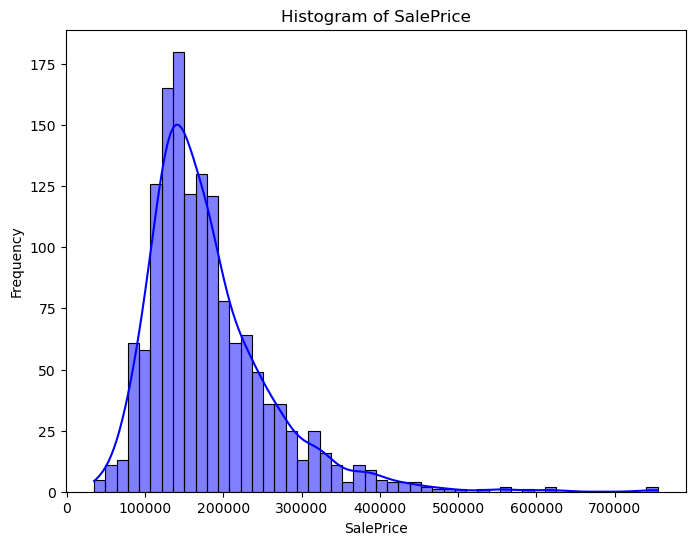

Skewness before log transformation: 1.883


In [9]:
# Histogram of 'SalePrice'
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], bins=50, kde=True, color='blue')
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Skewness of 'SalePrice'
skewness_before = df['SalePrice'].skew()
print(f'Skewness before log transformation: {skewness_before:.3f}')

- Target variable after log transformation

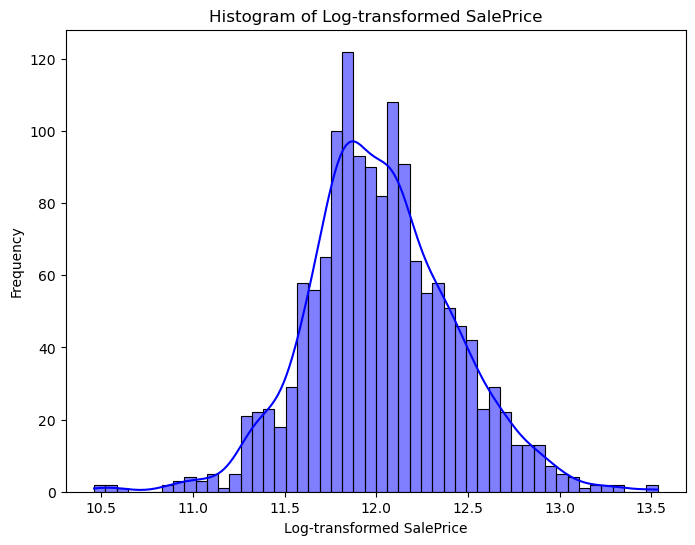

Skewness after log transformation: 0.121


In [10]:
# Target variable log transformation
log_transformed_saleprice = np.log1p(df['SalePrice'])

# Histogram of the log-transformed 'SalePrice'
plt.figure(figsize=(8, 6))
sns.histplot(log_transformed_saleprice, bins=50, kde=True, color='blue')
plt.title('Histogram of Log-transformed SalePrice')
plt.xlabel('Log-transformed SalePrice')
plt.ylabel('Frequency')
plt.show()

# Skewness of the log-transformed 'SalePrice'
skewness_after = log_transformed_saleprice.skew()
print(f'Skewness after log transformation: {skewness_after:.3f}')

In [11]:
# Analysis of categorical variables according to target variable
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({
        'COUNT': dataframe[categorical_col].value_counts(), 
        'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean(), 
        'RATIO': 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end='\n\n\n')


for col in cat_cols:
    target_summary_with_cat(df, 'SalePrice', col)

MSZoning
         COUNT  TARGET_MEAN  RATIO
C (all)     25    74528.000  0.856
FV         139   214014.062  4.762
RH          26   131558.375  0.891
RL        2265   191004.995 77.595
RM         460   126316.830 15.759


Street
      COUNT  TARGET_MEAN  RATIO
Grvl     12   130190.500  0.411
Pave   2907   181130.539 99.589


Alley
      COUNT  TARGET_MEAN  RATIO
Grvl    120   122219.080  4.111
Pave     78   168000.585  2.672


LotShape
     COUNT  TARGET_MEAN  RATIO
IR1    968   206101.665 33.162
IR2     76   239833.366  2.604
IR3     16   216036.500  0.548
Reg   1859   164754.818 63.686


LandContour
     COUNT  TARGET_MEAN  RATIO
Bnk    117   143104.079  4.008
HLS    120   231533.940  4.111
Low     60   203661.111  2.055
Lvl   2622   180183.747 89.825


Utilities
        COUNT  TARGET_MEAN  RATIO
AllPub   2916   180950.957 99.897
NoSeWa      1   137500.000  0.034


LotConfig
         COUNT  TARGET_MEAN  RATIO
Corner     511   181623.426 17.506
CulDSac    176   223854.617  6.029
FR2   

Step 5: Analyze outliers.

In [12]:
# Outlier thresholds
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [13]:
# Check outlier
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col, check_outlier(df, col))

Id False
MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd False
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
PoolArea True
MiscVal True
MoSold False
SalePrice True


Step 6: Perform missing observation analysis.

In [14]:
# Variables with missing values
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end='\n')

    if na_name:
        return na_columns


na_cols = missing_values_table(df, True)

              n_miss  ratio
PoolQC          2909 99.660
MiscFeature     2814 96.400
Alley           2721 93.220
Fence           2348 80.440
SalePrice       1459 49.980
FireplaceQu     1420 48.650
LotFrontage      486 16.650
GarageCond       159  5.450
GarageYrBlt      159  5.450
GarageFinish     159  5.450
GarageQual       159  5.450
GarageType       157  5.380
BsmtExposure      82  2.810
BsmtCond          82  2.810
BsmtQual          81  2.770
BsmtFinType2      80  2.740
BsmtFinType1      79  2.710
MasVnrType        24  0.820
MasVnrArea        23  0.790
MSZoning           4  0.140
Functional         2  0.070
BsmtHalfBath       2  0.070
BsmtFullBath       2  0.070
Utilities          2  0.070
KitchenQual        1  0.030
TotalBsmtSF        1  0.030
BsmtUnfSF          1  0.030
GarageCars         1  0.030
GarageArea         1  0.030
BsmtFinSF2         1  0.030
BsmtFinSF1         1  0.030
Exterior2nd        1  0.030
Exterior1st        1  0.030
SaleType           1  0.030
Electrical         1

In [15]:
# Relationship of missing values with the target variable
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains('_NA_')].columns
    for col in na_flags:
        print(pd.DataFrame({
            'COUNT': temp_df.groupby(col)[target].count(),
            'TARGET_MEAN': temp_df.groupby(col)[target].mean()}), end='\n\n\n')


missing_vs_target(df, 'SalePrice', na_cols)

                  COUNT  TARGET_MEAN
MSZoning_NA_FLAG                    
0                  1460   180921.196
1                     0          NaN


                     COUNT  TARGET_MEAN
LotFrontage_NA_FLAG                    
0                     1201   180770.480
1                      259   181620.073


               COUNT  TARGET_MEAN
Alley_NA_FLAG                    
0                 91   142845.912
1               1369   183452.131


                   COUNT  TARGET_MEAN
Utilities_NA_FLAG                    
0                   1460   180921.196
1                      0          NaN


                     COUNT  TARGET_MEAN
Exterior1st_NA_FLAG                    
0                     1460   180921.196
1                        0          NaN


                     COUNT  TARGET_MEAN
Exterior2nd_NA_FLAG                    
0                     1460   180921.196
1                        0          NaN


                    COUNT  TARGET_MEAN
MasVnrType_NA_FLAG               

Step 7: Perform correlation analysis.

In [16]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(
        np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(
        upper_triangle_matrix[col] > corr_th)]
    print(
        f'Columns to drop based on correlation threshold {corr_th}: \n{drop_list}')
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.2f',
                    linewidths=.5, annot_kws={'size': 8})
        plt.show()
    return drop_list

Columns to drop based on correlation threshold 0.7: 
['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']


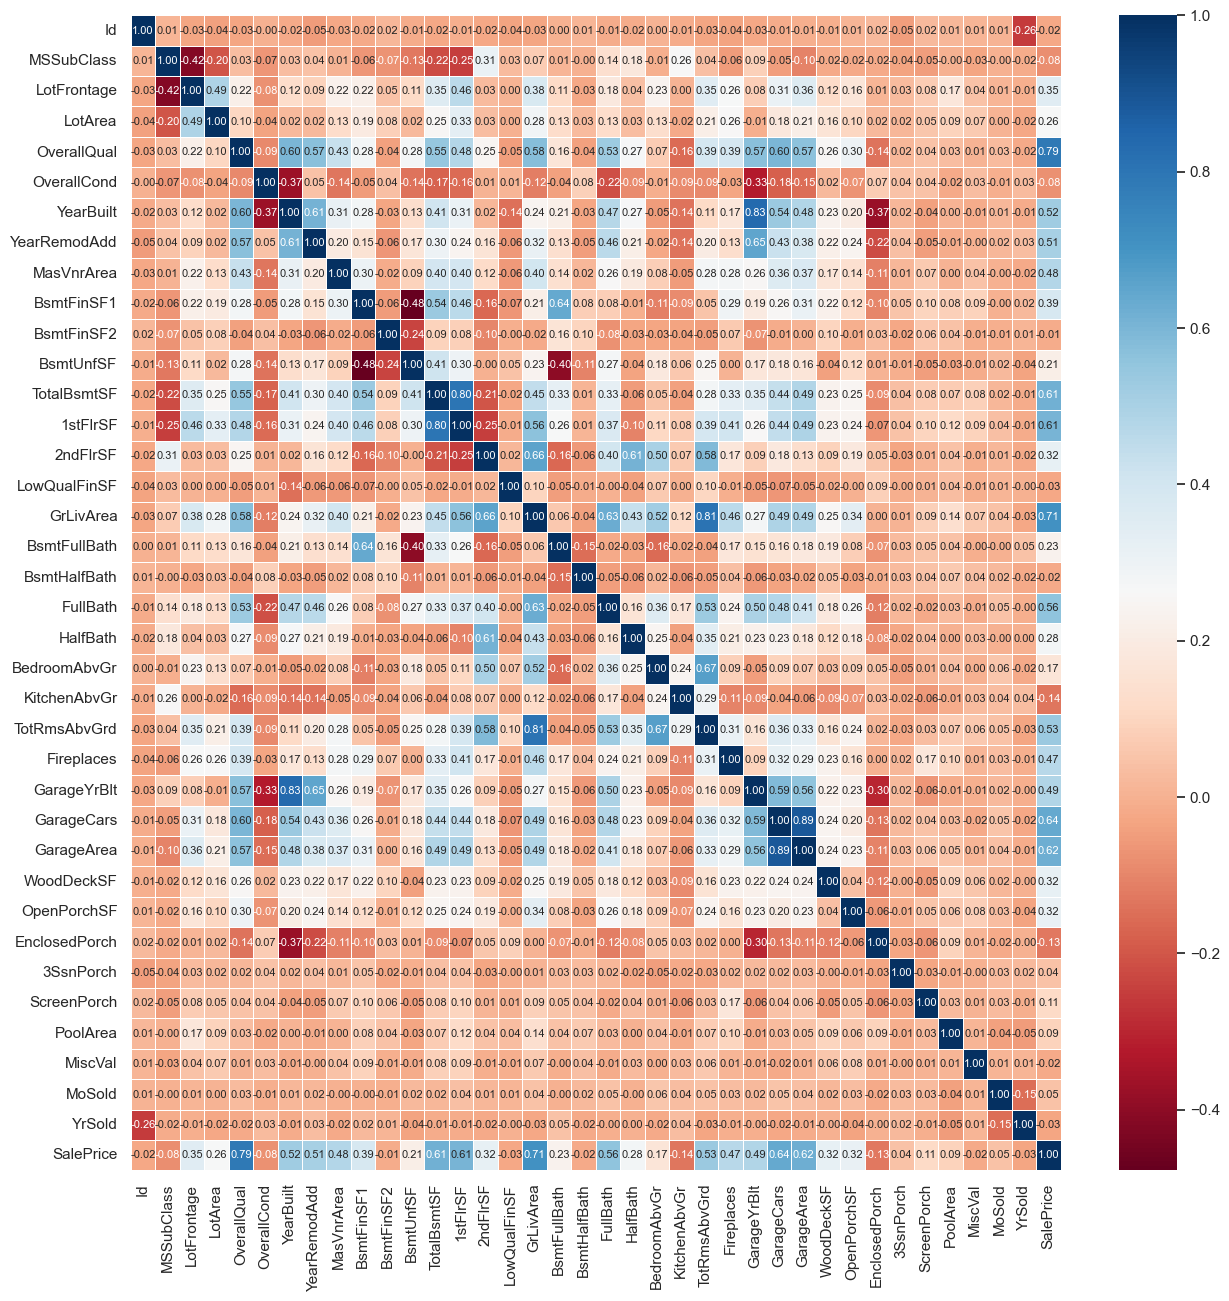

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [17]:
high_correlated_cols(df, plot=True)

In [18]:
# Target variable correlation with numerical variables
df[num_cols].corrwith(df['SalePrice']).sort_values(ascending=False)

SalePrice        1.000
OverallQual      0.791
GrLivArea        0.709
GarageArea       0.623
TotalBsmtSF      0.614
1stFlrSF         0.606
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
GarageYrBlt      0.486
MasVnrArea       0.477
BsmtFinSF1       0.386
LotFrontage      0.352
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
LotArea          0.264
BsmtUnfSF        0.214
ScreenPorch      0.111
PoolArea         0.092
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
MiscVal         -0.021
Id              -0.022
LowQualFinSF    -0.026
MSSubClass      -0.084
EnclosedPorch   -0.129
dtype: float64

# Task 2: 
Feature Engineering.

Step 1: Take the necessary action for missing and outlier observations.

- Outliers

In [19]:
# Replacing with thresholds
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    if col != 'SalePrice':
        replace_with_thresholds(df, col)

In [20]:
# Check outlier
for col in num_cols:
    print(col, check_outlier(df, col))

Id False
MSSubClass False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
PoolArea False
MiscVal False
MoSold False
SalePrice True


- Missing Values

In [21]:
# NaN values ​​in some variables indicate that the house does not have that feature
nan_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 
            'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in nan_cols:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'Alley': [nan 'Grvl' 'Pave']
Unique values in 'BsmtQual': ['Gd' 'TA' 'Ex' nan 'Fa']
Unique values in 'BsmtCond': ['TA' 'Gd' nan 'Fa' 'Po']
Unique values in 'BsmtExposure': ['No' 'Gd' 'Mn' 'Av' nan]
Unique values in 'BsmtFinType1': ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
Unique values in 'BsmtFinType2': ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Unique values in 'FireplaceQu': [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Unique values in 'GarageType': ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Unique values in 'GarageFinish': ['RFn' 'Unf' 'Fin' nan]
Unique values in 'GarageQual': ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Unique values in 'GarageCond': ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Unique values in 'PoolQC': [nan 'Ex' 'Fa' 'Gd']
Unique values in 'Fence': [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Unique values in 'MiscFeature': [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [22]:
# Filling 'NaN' values ​​with 'No'
for col in nan_cols:
    df[col].fillna('No', inplace=True)

In [23]:
# Filling missing values
def quick_missing_imp(data, num_method='median', cat_length=20, target='SalePrice'):
    # List of variables with missing values
    variables_with_na = [
        col for col in data.columns if data[col].isnull().sum() > 0]

    temp_target = data[target]

    print('# BEFORE')
    print(data[variables_with_na].isnull().sum(), "\n\n")

    # Categorical Variables: If the number of classes is equal or below cat_length, fill empty values ​​with mode
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (
        x.dtype == 'O' and len(x.unique()) <= cat_length) else x, axis=0)

    # Choosing Method for Numerical Variables
    # num_method: mean
    if num_method == 'mean':
        data = data.apply(lambda x: x.fillna(x.mean())
                          if x.dtype != 'O' else x, axis=0)
    # num_method: median
    elif num_method == 'median':
        data = data.apply(lambda x: x.fillna(x.median())
                          if x.dtype != 'O' else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() +
          "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), '\n\n')

    return data


df = quick_missing_imp(df, num_method='median', cat_length=17)

# BEFORE
MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

MSZoning           0
LotFrontage        0
Utilities          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Electrical         0
BsmtFullBath       0
BsmtHalfBath       0
KitchenQual        0
Functional         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
SaleType      

Step 2: Apply Rare Encoder.

In [24]:
def rare_analyser(dataframe, target, cat_cols):
    '''
    Analyze categorical columns in a DataFrame by displaying counts, ratios, and target means.

    Parameters
    ----------
    dataframe: DataFrame
        The input DataFrame to analyze.
    target: str
        The name of the target variable for target mean calculation.
    cat_cols: list
        A list of categorical column names to analyze.

    Returns
    -------
    None
    '''
    for col in cat_cols:
        print(col, ':', len(dataframe[col].value_counts()))
        
        # Create a DataFrame for analysis
        analysis_df = pd.DataFrame({
            'COUNT': dataframe[col].value_counts(),
            'TARGET_MEAN': dataframe.groupby(col)[target].mean(),
            'RATIO': dataframe[col].value_counts() / len(dataframe)})
        
        # Sort the DataFrame by the 'RATIO' column in ascending=True or False
        analysis_df = analysis_df.sort_values(by='RATIO', ascending=False)
        
        print(analysis_df, end='\n\n\n')


rare_analyser(df, 'SalePrice', cat_cols)

MSZoning : 5
         COUNT  TARGET_MEAN  RATIO
RL        2269   191004.995  0.777
RM         460   126316.830  0.158
FV         139   214014.062  0.048
RH          26   131558.375  0.009
C (all)     25    74528.000  0.009


Street : 2
      COUNT  TARGET_MEAN  RATIO
Pave   2907   181130.539  0.996
Grvl     12   130190.500  0.004


Alley : 3
      COUNT  TARGET_MEAN  RATIO
No     2721   183452.131  0.932
Grvl    120   122219.080  0.041
Pave     78   168000.585  0.027


LotShape : 4
     COUNT  TARGET_MEAN  RATIO
Reg   1859   164754.818  0.637
IR1    968   206101.665  0.332
IR2     76   239833.366  0.026
IR3     16   216036.500  0.005


LandContour : 4
     COUNT  TARGET_MEAN  RATIO
Lvl   2622   180183.747  0.898
HLS    120   231533.940  0.041
Bnk    117   143104.079  0.040
Low     60   203661.111  0.021


Utilities : 2
        COUNT  TARGET_MEAN  RATIO
AllPub   2918   180950.957  1.000
NoSeWa      1   137500.000  0.000


LotConfig : 5
         COUNT  TARGET_MEAN  RATIO
Inside    2133  

In [25]:
# Detection of rare classes
def rare_encoder(dataframe, rare_perc):
    '''
    Encode rare classes in categorical columns of a DataFrame.

    Parameters
    ----------
    dataframe: DataFrame
        The input DataFrame to perform rare encoding.
    rare_perc: float
        The threshold percentage to consider classes as rare.

    Returns
    -------
    - DataFrame
        The DataFrame with rare classes encoded as 'Rare'.
    '''
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df


df_rare = rare_encoder(df, 0.01)

In [26]:
rare_analyser(df_rare, 'SalePrice', cat_cols)

MSZoning : 4
      COUNT  TARGET_MEAN  RATIO
RL     2269   191004.995  0.777
RM      460   126316.830  0.158
FV      139   214014.062  0.048
Rare     51   109623.615  0.017


Street : 2
      COUNT  TARGET_MEAN  RATIO
Pave   2907   181130.539  0.996
Rare     12   130190.500  0.004


Alley : 3
      COUNT  TARGET_MEAN  RATIO
No     2721   183452.131  0.932
Grvl    120   122219.080  0.041
Pave     78   168000.585  0.027


LotShape : 4
      COUNT  TARGET_MEAN  RATIO
Reg    1859   164754.818  0.637
IR1     968   206101.665  0.332
IR2      76   239833.366  0.026
Rare     16   216036.500  0.005


LandContour : 4
     COUNT  TARGET_MEAN  RATIO
Lvl   2622   180183.747  0.898
HLS    120   231533.940  0.041
Bnk    117   143104.079  0.040
Low     60   203661.111  0.021


Utilities : 2
        COUNT  TARGET_MEAN  RATIO
AllPub   2918   180950.957  1.000
Rare        1   137500.000  0.000


LotConfig : 5
         COUNT  TARGET_MEAN  RATIO
Inside    2133   176938.048  0.731
Corner     511   181623.42

In [27]:
# Checking an example: The variable 'RoofStyle' before and after rare encoding
print(f"Before Rare Encoding - 'RoofStyle':\n{df['RoofStyle'].value_counts()}\n\nAfter Rare Encoding - 'RoofStyle':\n{df_rare['RoofStyle'].value_counts()}")

Before Rare Encoding - 'RoofStyle':
Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

After Rare Encoding - 'RoofStyle':
Gable    2310
Hip       551
Rare       58
Name: RoofStyle, dtype: int64


Step 3: Create new variables.

In [28]:
# First floor square feet * Above grade (ground) living area square feet
df['NEW_1st*GrLiv'] = df['1stFlrSF'] * df['GrLivArea']

# Size of garage in square feet * Above grade (ground) living area square feet
df['NEW_Garage*GrLiv'] = (df['GarageArea'] * df['GrLivArea'])

# Total Quality
df['TotalQual'] = df[['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 
                    'BsmtQual' ,'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                    'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 
                    'FireplaceQu', 'GarageQual', 'GarageCond', 
                    'PoolQC', 'Fence']].sum(axis=1)

# Total Floor Square Feet = First floor square feet + Second floor square feet
df['NEW_TotalFlrSF'] = df['1stFlrSF'] + df['2ndFlrSF']

# Total square feet of finished basement area = Type 1 + Type 2 finished square feet 
df['NEW_TotalBsmtFin'] = df['BsmtFinSF1'] + df['BsmtFinSF2']

# Porch Area
df['NEW_PorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + \
                      df['ScreenPorch'] + df['3SsnPorch'] + df['WoodDeckSF']

# Total House Area = Total floor square feet area + Total square feet of basement area
df['NEW_TotalHouseArea'] = df['NEW_TotalFlrSF'] + df['TotalBsmtSF']

# Above grade (ground) living area square feet + Total square feet of basement area
df['NEW_TotalSqFeet'] = df['GrLivArea'] + df['TotalBsmtSF']

# Lot Ratio = Above grade (ground) living area square feet + Lot size in square feet
df['NEW_LotRatio'] = df['GrLivArea'] / df['LotArea']

# Area Ratio  = Total house area + Lot size in square feet
df['NEW_AreaRatio'] = df['NEW_TotalHouseArea'] / df['LotArea']

# Garage Lot Ratio = Size of garage in square feet +  + Lot size in square feet
df["NEW_GarageLotRatio"] = df['GarageArea'] / df['LotArea']

# Masonry Veneer Ratio = Masonry veneer area in square feet + Total house area
df['NEW_MasVnrRatio'] = df['MasVnrArea'] / df['NEW_TotalHouseArea']

# Dif Area
df['NEW_DifArea'] = (df['LotArea'] - df['1stFlrSF'] - \
                    df['GarageArea'] - df['NEW_PorchArea'] - df['WoodDeckSF'])

# Overall Grade = Rates the overall material and finish of the house * Rates the overall condition of the house
df['NEW_OverallGrade'] = df['OverallQual'] * df['OverallCond']

# Restoration Date = Remodel date - Original construction date
df['NEW_Restoration'] = df['YearRemodAdd'] - df['YearBuilt']

# House Age = Year sold - Original construction date
df['NEW_HouseAge'] = df['YrSold'] - df['YearBuilt']

# Restoration Age = Year sold - Remodel date
df['NEW_RestorationAge'] = df['YrSold'] - df['YearRemodAdd']

# Garage Age = Year garage was built - Original construction date
df['NEW_GarageAge'] = df['GarageYrBlt'] - df['YearBuilt']

# Garage Restoration Age = Year garage was built - Remodel date
df['NEW_GarageRestorationAge'] = np.abs(df['GarageYrBlt'] - df['YearRemodAdd'])

# Garage Sold Date = Year sold - Remodel date
df['NEW_GarageSold'] = df['YrSold'] - df['GarageYrBlt']

In [29]:
drop_list = ['Street', 'Alley', 'LandContour', 'Utilities',
             'LandSlope', 'Heating', 'MiscFeature', 'Neighborhood']

df.drop(drop_list, axis=1, inplace=True)

Step 4: Perform the encoding operations.

In [30]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 93
cat_cols: 49
num_cols: 44
cat_but_car: 0
num_but_cat: 14


- Label Encoding

In [31]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [32]:
binary_cols = [col for col in df.columns if df[col].dtypes == 'O' and df[col].nunique() == 2]
binary_cols

['CentralAir']

In [33]:
for col in binary_cols:
    label_encoder(df, col)

In [34]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,TotalQual,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_LotRatio,NEW_AreaRatio,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold
0,1.000,60,RL,65.000,8450.000,Reg,Inside,Norm,Norm,1Fam,2Story,7,5,2003,2003.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,Ex,1,SBrkr,856.000,854.000,0,1710.000,1.000,0.000,2,1,3,1,Gd,8.000,Typ,0,No,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61.000,0,0,0.000,0,No,No,0,2.000,2008,WD,Normal,208500.000,1463760.000,937080.000,12,1710.000,706.000,61.000,2566.000,2566.000,0.202,0.304,0.065,0.076,6985.000,35,0.000,5,5.000,0.000,0.000,5.000
1,2.000,20,RL,80.000,9600.000,Reg,FR2,Feedr,Norm,1Fam,1Story,6,8,1976,1976.000,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,Ex,1,SBrkr,1262.000,0.000,0,1262.000,0.000,1.000,2,0,3,1,TA,6.000,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0.000,0,0,0.000,0,No,No,0,5.000,2007,WD,Normal,181500.000,1592644.000,580520.000,14,1262.000,978.000,298.000,2524.000,2524.000,0.131,0.263,0.048,0.000,7282.000,48,0.000,31,31.000,0.000,0.000,31.000
2,3.000,60,RL,68.000,11250.000,IR1,Inside,Norm,Norm,1Fam,2Story,7,5,2001,2002.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,Ex,1,SBrkr,920.000,866.000,0,1786.000,1.000,0.000,2,1,3,1,Gd,6.000,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42.000,0,0,0.000,0,No,No,0,9.000,2008,WD,Normal,223500.000,1643120.000,1085888.000,12,1786.000,486.000,42.000,2706.000,2706.000,0.159,0.241,0.054,0.060,9680.000,35,1.000,7,6.000,0.000,1.000,7.000
3,4.000,70,RL,60.000,9550.000,IR1,Corner,Norm,Norm,1Fam,2Story,7,5,1915,1970.000,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,Gd,1,SBrkr,961.000,756.000,0,1717.000,1.000,0.000,1,0,3,1,Gd,7.000,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35.000,272,0,0.000,0,No,No,0,2.000,2006,WD,Abnorml,140000.000,1650037.000,1102314.000,12,1717.000,216.000,307.000,2473.000,2473.000,0.180,0.259,0.067,0.000,7640.000,35,55.000,91,36.000,83.000,28.000,8.000
4,5.000,60,RL,84.000,14260.000,IR1,FR2,Norm,Norm,1Fam,2Story,8,5,2000,2000.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,Ex,1,SBrkr,1145.000,1053.000,0,2198.000,1.000,0.000,2,1,4,1,Gd,9.000,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84.000,0,0,0.000,0,No,No,0,12.000,2008,WD,Normal,250000.000,2516710.000,1837528.000,13,2198.000,655.000,276.000,3343.000,3343.000,0.154,0.234,0.059,0.105,11811.000,40,0.000,8,8.000,0.000,0.000,8.000


- One-Hot Encoding

In [35]:
cat_cols = [col for col in cat_cols if col not in binary_cols]
len(cat_cols)

48

In [36]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


df = one_hot_encoder(df, cat_cols, drop_first=True)

In [37]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,TotalQual,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_LotRatio,NEW_AreaRatio,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,YrSold_2007,YrSold_

In [38]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 266
cat_cols: 222
num_cols: 44
cat_but_car: 0
num_but_cat: 222


# Task 3: 
Model Building.

Step 1: Separate train and test data (Values ​​with empty 'SalePrice' variable are test data).

In [39]:
df_train = df[df['SalePrice'].notnull()]
df_test = df[df['SalePrice'].isnull()]

In [40]:
df_test['SalePrice'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: SalePrice, dtype: float64

Step 2: Build a model with train data and evaluate the success of the model.

In [41]:
y = df_train['SalePrice']
X = df_train.drop(['Id', 'SalePrice'], axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('ElasticNet', ElasticNet()),
          ('GBM', GradientBoostingRegressor()),
          ('XGBoost', XGBRegressor(objective='reg:squarederror')),
          ('LightGBM', LGBMRegressor()),
          ('SVR', SVR()),
          ('Lasso', Lasso()),
          ('Ridge', Ridge())
          ]

- Cross-Validation

In [44]:
for name, model in models:
    rmse = np.mean(np.sqrt(-cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')))
    print(f'RMSE: {rmse:.3f} ({name})')

RMSE: 70863.922 (LR)
RMSE: 46921.022 (KNN)
RMSE: 39569.953 (CART)
RMSE: 29000.329 (RF)
RMSE: 34126.846 (ElasticNet)
RMSE: 25852.075 (GBM)
RMSE: 27930.848 (XGBoost)
RMSE: 28647.566 (LightGBM)
RMSE: 81073.838 (SVR)
RMSE: 43053.906 (Lasso)
RMSE: 62226.452 (Ridge)


- Holdout Validation

In [45]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'RMSE: {rmse:.3f} ({name})')

RMSE: 46701.670 (LR)
RMSE: 45242.722 (KNN)
RMSE: 39270.764 (CART)
RMSE: 28495.124 (RF)
RMSE: 35066.460 (ElasticNet)
RMSE: 27413.613 (GBM)
RMSE: 30281.081 (XGBoost)
RMSE: 29862.082 (LightGBM)
RMSE: 88583.905 (SVR)
RMSE: 44434.304 (Lasso)
RMSE: 77718.527 (Ridge)


Bonus: Build a model by log transforming the target variable and observe the RMSE results. 

Note: Do not forget to inverse the log.

In [46]:
df_train = df[df['SalePrice'].notnull()]
df_test = df[df['SalePrice'].isnull()]

In [47]:
y = np.log1p(df_train['SalePrice']) # Log transformation
X = df_train.drop(['Id', 'SalePrice'], axis=1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [49]:
# LGBM model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

LGBMRegressor(random_state=42)

- Holdout Validation before Hyperparameter Optimization

In [50]:
y_pred_test_before_opt = lgbm_model.predict(X_test)
rmse_test_before_opt = round(np.sqrt(mean_squared_error(np.expm1(y_test), 
                                                        np.expm1(y_pred_test_before_opt))), 
                                                        3) # RMSE & inverse of the log

print(f'Holdout RMSE Test Before Hyperparameter Optimization: {rmse_test_before_opt}')

Holdout RMSE Test Before Hyperparameter Optimization: 29678.248


Step 3: Perform hyperparameter optimization.

In [51]:
# LGBM model
lgbm_model = LGBMRegressor(random_state=42)

- Cross-Validation before Hyperparameter Optimization

In [52]:
cv_rmse_before_opt = round(np.mean(np.sqrt(-cross_val_score(lgbm_model, 
                                                           X, 
                                                           y, 
                                                           cv=5, 
                                                           scoring='neg_mean_squared_error'))), 3)

print(f'CV RMSE Before Hyperparameter Optimization: {cv_rmse_before_opt}')

CV RMSE Before Hyperparameter Optimization: 0.134


In [53]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [54]:
lgbm_params = {'learning_rate': [0.01, 0.05, 0.1], 
               'n_estimators': [250, 500, 1500, 3000],
               'colsample_bytree': [0.5, 0.7, 0.8, 1],
              }

In [55]:
grid_search = GridSearchCV(lgbm_model, 
                           lgbm_params,
                           cv=5, 
                           n_jobs=-1, 
                           verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [56]:
grid_search.best_params_

{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 1500}

In [57]:
grid_search.best_score_

0.8954476147445387

In [58]:
lgbm_tuned = lgbm_model.set_params(**grid_search.best_params_, random_state=42)
lgbm_tuned.fit(X, y)

LGBMRegressor(colsample_bytree=0.5, learning_rate=0.01, n_estimators=1500,
              random_state=42)

- Cross-Validation after Hyperparameter Optimization

In [59]:
cv_rmse_after_opt = round(np.mean(np.sqrt(-cross_val_score(lgbm_tuned, 
                                                           X, 
                                                           y, 
                                                           cv=5, 
                                                           scoring='neg_mean_squared_error'))), 3)

print(f'CV RMSE After Hyperparameter Optimization: {cv_rmse_after_opt}')

CV RMSE After Hyperparameter Optimization: 0.128


- Holdout Validation after Hyperparameter Optimization

In [60]:
y_pred_test_after_opt = lgbm_tuned.predict(X_test)
rmse_test_after_opt = round(np.sqrt(mean_squared_error(np.expm1(y_test), 
                                                       np.expm1(y_pred_test_after_opt))), 
                                                       3) # RMSE & inverse of the log

print(f'Holdout RMSE Test After Hyperparameter Optimization: {rmse_test_after_opt}')

Holdout RMSE Test After Hyperparameter Optimization: 9551.789


- Root Mean Squared Error (RMSE) before and after Hyperparameter Optimization

In [61]:
# Results for LightGBM
results = [['Before Hyperparameter Opt.', cv_rmse_before_opt, rmse_test_before_opt], 
        ['After Hyperparameter Opt.', cv_rmse_after_opt, rmse_test_after_opt]]

# Column names
columns = ['', 'RMSE_CV', 'RMSE_Test']

# Table formatting
table = tabulate(results, headers=columns, tablefmt='simple_grid', floatfmt='.3f')

print(table)

┌────────────────────────────┬───────────┬─────────────┐
│                            │   RMSE_CV │   RMSE_Test │
├────────────────────────────┼───────────┼─────────────┤
│ Before Hyperparameter Opt. │     0.134 │   29678.248 │
├────────────────────────────┼───────────┼─────────────┤
│ After Hyperparameter Opt.  │     0.128 │    9551.789 │
└────────────────────────────┴───────────┴─────────────┘


Step 4: Examine the variable importance level.

In [62]:
# Feature importance
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values('Value',ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x='Value', y='Feature', data=feature_imp.sort_values(by='Value',
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

     Value                   Feature
23    1485             NEW_1st*GrLiv
28    1416             NEW_PorchArea
29    1389        NEW_TotalHouseArea
2     1306                   LotArea
10    1294               TotalBsmtSF
31    1290              NEW_LotRatio
24    1290          NEW_Garage*GrLiv
33    1287        NEW_GarageLotRatio
35    1286               NEW_DifArea
9     1271                 BsmtUnfSF
12    1154                  1stFlrSF
17    1101                GarageArea
1     1097               LotFrontage
14    1097                 GrLivArea
27    1046          NEW_TotalBsmtFin
36    1036          NEW_OverallGrade
19    1031               OpenPorchSF
32    1017             NEW_AreaRatio
7     1001                BsmtFinSF1
30     978           NEW_TotalSqFeet
6      952                MasVnrArea
38     915              NEW_HouseAge
16     911               GarageYrBlt
39     897        NEW_RestorationAge
4      882                 YearBuilt
26     819            NEW_TotalFlrSF
2

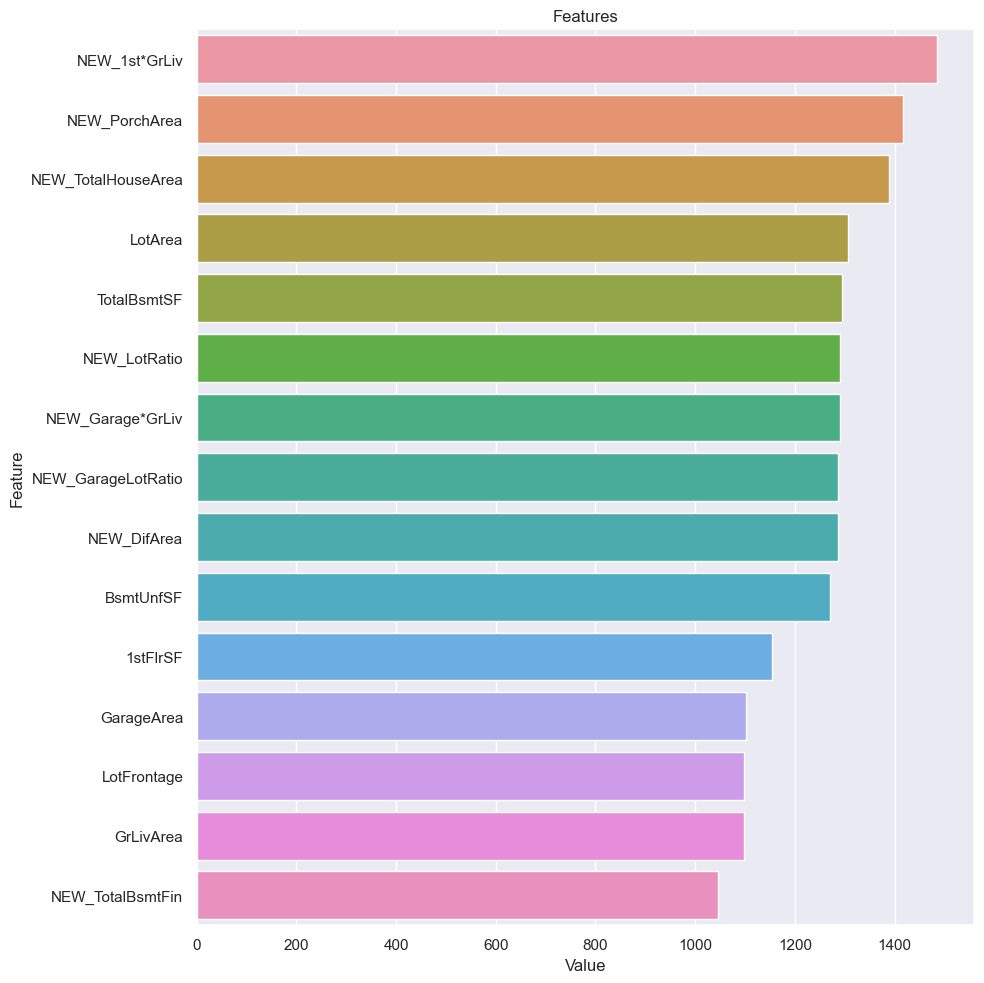

In [63]:
plot_importance(lgbm_tuned, X, num=15)

Bonus: Predict the empty 'SalePrice' variables in the test data and create a dataframe suitable for submitting to the Kaggle page.

In [64]:
model = LGBMRegressor()
model.fit(X, y)

LGBMRegressor()

In [65]:
predictions = model.predict(df_test.drop(['Id', 'SalePrice'], axis=1))

In [66]:
dictionary = {'Id': df_test.index, 'SalePrice': predictions}

In [67]:
dfSubmission = pd.DataFrame(dictionary)
dfSubmission.to_csv('submission.csv', index=False)